In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

In [8]:
N, D, H = 64, 1000, 100
x = tf.placeholder(tf.float32, shape=(N, D))
y = tf.placeholder(tf.float32, shape=(N, D))


init=tf.variance_scaling_initializer(2.0)      #here we use initializer .. 
h=tf.layers.dense(inputs=x,units=H, activation=tf.nn.relu, kernel_initializer=init)
y_pred = tf.layers.dense(inputs=h,units=D,kernel_initializer=init)


loss = tf.losses.mean_squared_error(y_pred, y)       

optimizer = tf.train.GradientDescentOptimizer(1e-5)  
updates = optimizer.minimize(loss)

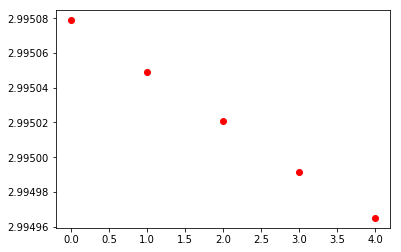

2.9950788 2.994965


In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    values = {x: np.random.randn(N, D),
              y: np.random.randn(N, D)}
    out = sess.run([loss],feed_dict=values)
    
    loss_summery=[]
    steps=5000
    for t in range(steps):
        out = sess.run([loss, updates],feed_dict=values)
        loss_val, _ = out
        loss_summery.append(loss_val)
    plt.plot(range(steps), loss_summery, 'ro',label='loss_value')
    plt.show()
    print(loss_summery[0],loss_summery[steps-1])
